In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
# Load data
df = pd.read_csv('data.csv')

In [3]:
# Feature Engineering
df['amount_ratio'] = df['amount'] / df['oldbalanceOrg'].replace(0, 1)
df['balance_diff'] = df['newbalanceDest'] - df['oldbalanceDest']
df['origin_balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']


In [4]:
# Define labels
df['label'] = df['isFraud'] # Start with the fraud labels
df.loc[(df['label'] == 0) & (df['amount'] > 200000), 'label'] = 2  # Mark large non-fraudulent transactions as suspicious

In [5]:
# Train/Test Split
X = df[['amount', 'amount_ratio', 'balance_diff', 'origin_balance_change']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Prediction
y_pred = model.predict(X_test)


In [8]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1405377
           1       1.00      1.00      1.00      2435
           2       1.00      1.00      1.00    500974

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



In [9]:
# Assuming 'label' column contains 0 for non-fraudulent, 1 for fraudulent, and 2 for suspicious transactions

# Count the number of transactions in each category
category_counts = df['label'].value_counts()

# Display the counts
print("Number of transactions in each category:")
print(f"Non-Fraudulent (0): {category_counts.get(0, 0)}")
print(f"Fraudulent (1): {category_counts.get(1, 0)}")
print(f"Suspicious (2): {category_counts.get(2, 0)}")


Number of transactions in each category:
Non-Fraudulent (0): 4686308
Fraudulent (1): 8213
Suspicious (2): 1668099


In [10]:
# Alert Program Function
def alert_system(transaction):
    pred = model.predict(transaction)
    if pred == 1:
        return "ALERT: Fraudulent Transaction!"
    elif pred == 2:
        return "ALERT: Suspicious Transaction!"
    else:
        return "Transaction is Normal."

In [11]:
sample_transaction = pd.DataFrame({
    'amount': [50000],  # Set an example amount
    'amount_ratio': [0.8],  # Set example ratio
    'balance_diff': [30000],  # Set example balance difference
    'origin_balance_change': [-20000]  # Set example origin balance change
})
alert = alert_system(sample_transaction)
print(alert)

Transaction is Normal.


In [15]:
sample_transaction = pd.DataFrame({
    'amount': [58230000],  # Set an example amount
    'amount_ratio': [0.7],  # Set example ratio
    'balance_diff': [80014],  # Set example balance difference
    'origin_balance_change': [385105]  # Set example origin balance change
})
alert = alert_system(sample_transaction)
print(alert)

ALERT: Suspicious Transaction!


In [16]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and you have already defined X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Access the test data
print("Features in the test set:")
print(X_test)

print("Labels in the test set:")
print(y_test)

Features in the test set:
             amount  amount_ratio  balance_diff  origin_balance_change
3737323   330218.42  1.582567e+01    -330218.42             -330218.42
264914     11647.08  3.835061e-01          0.00               11647.08
85647     152264.21  1.428517e+00    -152264.21             -152264.21
5899326  1551760.63  1.551761e+06    1551760.63                   0.00
2544263    78172.30  2.675913e-02     -78172.30              -78172.30
...             ...           ...           ...                    ...
6201010   152332.80  4.951014e+00     152332.80               30768.00
4682236   170955.62  8.016676e+00     170955.62               21325.00
5398320     1198.78  5.220597e-02          0.00                1198.77
5319864    33472.42  3.347242e+04          0.00                   0.00
1453256   270211.28  2.477449e-01    -270211.28             -270211.28

[1908786 rows x 4 columns]
Labels in the test set:
3737323    2
264914     0
85647      0
5899326    2
2544263    0
     

In [17]:
print("First 5 rows of Test Data (X_test):")
print(X_test.head())



First 5 rows of Test Data (X_test):
             amount  amount_ratio  balance_diff  origin_balance_change
3737323   330218.42  1.582567e+01    -330218.42             -330218.42
264914     11647.08  3.835061e-01          0.00               11647.08
85647     152264.21  1.428517e+00    -152264.21             -152264.21
5899326  1551760.63  1.551761e+06    1551760.63                   0.00
2544263    78172.30  2.675913e-02     -78172.30              -78172.30


In [18]:
sample_transaction = pd.DataFrame({
    'amount': [45000000],  # Set an example amount
    'amount_ratio': [0.1],  # Set example ratio
    'balance_diff': [-5005],  # Set example balance difference
    'origin_balance_change': [-1452]  # Set example origin balance change
})
alert = alert_system(sample_transaction)
print(alert)

ALERT: Fraudulent Transaction!


In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predictions on the test set
y_pred = model.predict(X_test)


In [20]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1405377
           1       1.00      1.00      1.00      2435
           2       1.00      1.00      1.00    500974

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



In [21]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [22]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1405375       2       0]
 [      5    2425       5]
 [      0       1  500973]]


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(accuracy_score))

print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())


Cross-Validation Accuracy Scores: [0.99997485 0.99999057 0.99999528 0.99999528 0.99999686]
Mean Cross-Validation Accuracy: 0.9999905699224534


In [24]:
from sklearn.metrics import classification_report

# Predict on the test data
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent', 'Suspicious'])
print(report)


                precision    recall  f1-score   support

Non-Fraudulent       1.00      1.00      1.00   1405377
    Fraudulent       1.00      1.00      1.00      2435
    Suspicious       1.00      1.00      1.00    500974

      accuracy                           1.00   1908786
     macro avg       1.00      1.00      1.00   1908786
  weighted avg       1.00      1.00      1.00   1908786



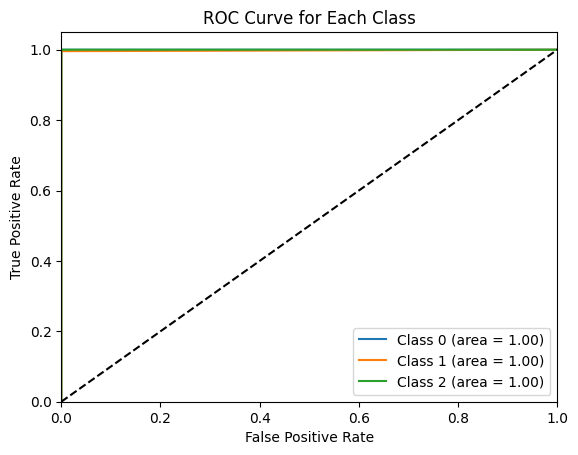

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Binarize the labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Train the OneVsRest model
model_ovr = OneVsRestClassifier(model)
y_score = model_ovr.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


In [1]:
# Count the number of transactions in each category
category_counts = df['label'].value_counts()

# Display the counts
print("Number of transactions in each category:")
print(f"Non-Fraudulent (0): {category_counts.get(0, 0)}")
print(f"Fraudulent (1): {category_counts.get(1, 0)}")
print(f"Suspicious (2): {category_counts.get(2, 0)}")

NameError: name 'df' is not defined